In [1]:
pip install pandas numpy matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = 'Hyundai_motors_stock.csv'  # Path to your dataset
data = pd.read_csv(file_path)

#Inspect the data
print(data.head())

# Convert 'Date' column to datetime and sort the dataset
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values('Date')

print(data.head())

# Use only the 'Close' column for predictions
stock_data = data[['Close']]

         Date    Open    High     Low   Close     Adj Close   Volume
0  02-01-2020  121000  121000  118000  118000  100857.64840   556532
1  03-01-2020  118500  119000  115000  116000   99148.20313  1145187
2  06-01-2020  116000  117000  115500  116000   99148.20313   334574
3  07-01-2020  116500  117000  115500  115500   98720.82813   674196
4  08-01-2020  115000  115500  111500  112000   95729.29688  1044825
        Date    Open    High     Low   Close     Adj Close   Volume
0 2020-01-02  121000  121000  118000  118000  100857.64840   556532
1 2020-01-03  118500  119000  115000  116000   99148.20313  1145187
2 2020-01-06  116000  117000  115500  116000   99148.20313   334574
3 2020-01-07  116500  117000  115500  115500   98720.82813   674196
4 2020-01-08  115000  115500  111500  112000   95729.29688  1044825


In [22]:
# Step 2: Data Preprocessing
# Scale the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(stock_data)

# Function to create datasets with time steps
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Create training features and labels
time_step = 60
X, Y = create_dataset(data_scaled, time_step)

# Reshape input to match LSTM input shape [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [23]:
# Step 3: Build the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Adarsh Chaube\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Step 4: Train the Model
model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0715
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0032
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0017
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0015
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0012
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0010    
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0013
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 9.0766e-04
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0014
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.5228e-04
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 9.4267e-04
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 9.2716e-04
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step

In [25]:
# Step 5: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse scale the actual test values for comparison
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


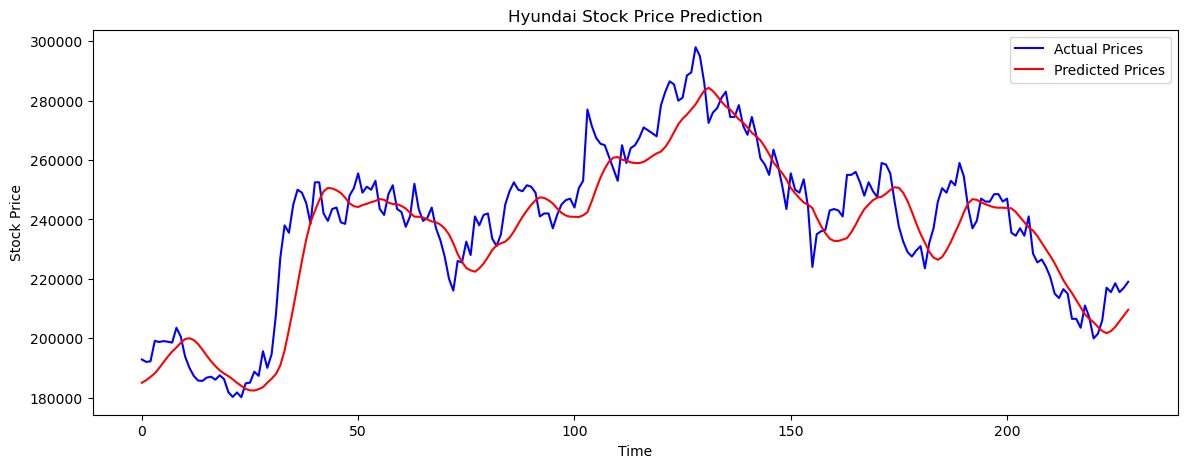

In [26]:
# Step 6: Visualize Results
plt.figure(figsize=(14, 5))
plt.plot(Y_test_scaled, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Hyundai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [27]:
# Step 7: Predict Future Prices
def predict_future(data, model, steps=60, future_days=20):
    temp_input = data[-steps:].reshape(1, steps, 1)
    future_predictions = []
    for _ in range(future_days):  # Predict for 'future_days'
        next_pred = model.predict(temp_input, verbose=0)
        future_predictions.append(next_pred[0, 0])
        temp_input = np.append(temp_input[:, 1:, :], [[[next_pred[0, 0]]]], axis=1)
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

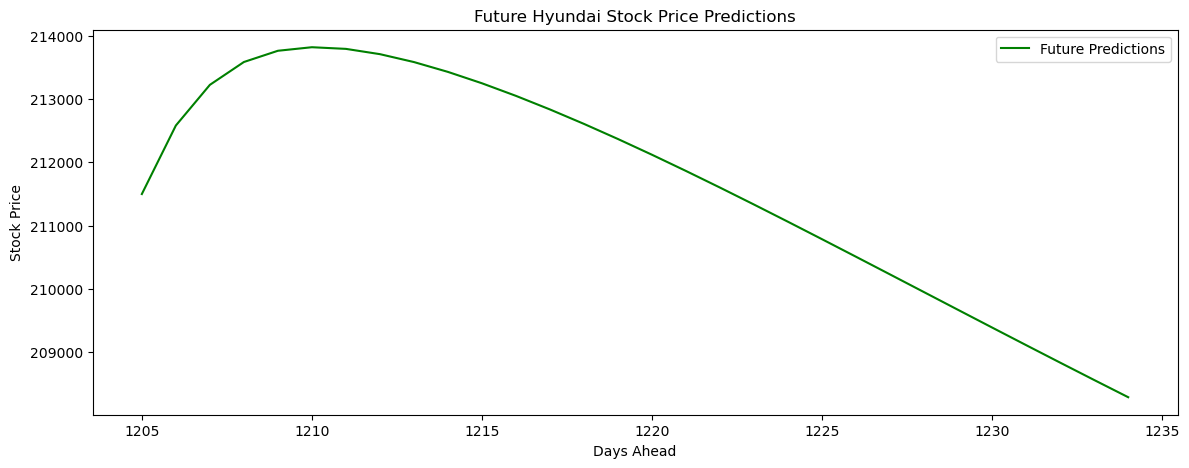

In [29]:
# Predict for the next 30 days
future_days = 30
future_prices = predict_future(data_scaled, model, future_days=future_days)

# Plot future predictions
plt.figure(figsize=(14, 5))
plt.plot(range(len(stock_data), len(stock_data) + len(future_prices)), future_prices, color='green', label='Future Predictions')
plt.title('Future Hyundai Stock Price Predictions')
plt.xlabel('Days Ahead')
plt.ylabel('Stock Price')
plt.legend()
plt.show()